# Import packages we will use

In [10]:
import pandas as pd
import plotly.express as px

# read in the files we will look at

In [35]:
indir="../testdata/"
df = pd.read_csv(indir+"psea_scores_20240919-161614.adjpval.csv", index_col=0)
genedf = pd.read_csv(indir+"genes.csv", index_col=0)

In [36]:
genedf["value"]=genedf["gene_id"]

# Look at the files

In [37]:
df

,binary_attribute,value,runpsea,NES,pval,adjpval
24553,patent_foramen_ovale,ENSG00000232010,included,-5.9646897196808,6.628414e-12,5.400037e-07
24239,patent_foramen_ovale,ENSG00000183255,included,5.575281011307165,2.543059e-10,2.071779e-05
25230,astigmatism,ENSG00000223806,included,-5.729032788457572,3.453556e-10,2.813543e-05
20802,obesity_disorder,ENSG00000155307,included,-5.458381940374075,6.326142e-10,5.153781e-05
34918,pulmonary_hypertension,ENSG00000154642,included,-5.67341676839355,9.628157e-10,7.843867e-05
...,...,...,...,...,...,...
121321,Tourette_syndrome,ENSG00000283051,included,ba_or_value_are_all_identical,NaN,NaN
121322,Tourette_syndrome,ENSG00000283300,included,ba_or_value_are_all_identical,NaN,NaN
121323,Tourette_syndrome,ENSG00000283904,included,ba_or_value_are_all_identical,NaN,NaN
121324,Tourette_syndrome,ENSG00000284448,included,ba_or_value_are_all_identical,NaN,NaN


In [38]:
df_nona = df.dropna()

# Most genes don't vary with most comorbiditys


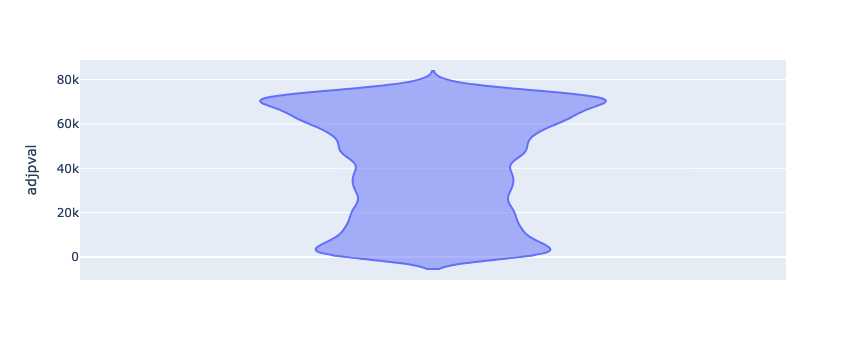

In [39]:
fig = px.violin(df_nona, y="adjpval")
fig.show()


# Find pairs predicted by PSEA

In [50]:
df_nona_threshold = df_nona[df_nona["adjpval"]<6]

In [51]:
df_nona_threshold

,binary_attribute,value,runpsea,NES,pval,adjpval
24553,patent_foramen_ovale,ENSG00000232010,included,-5.9646897196808,6.628414e-12,5.400037e-07
24239,patent_foramen_ovale,ENSG00000183255,included,5.575281011307165,2.543059e-10,2.071779e-05
25230,astigmatism,ENSG00000223806,included,-5.729032788457572,3.453556e-10,2.813543e-05
20802,obesity_disorder,ENSG00000155307,included,-5.458381940374075,6.326142e-10,5.153781e-05
34918,pulmonary_hypertension,ENSG00000154642,included,-5.67341676839355,9.628157e-10,7.843867e-05
...,...,...,...,...,...,...
27092,asthma,ENSG00000234030,included,3.961624893229368,6.974760e-05,5.682198e+00
35282,pulmonary_hypertension,ENSG00000228107,included,-3.9450216830520772,7.061104e-05,5.752540e+00
19978,cardiac_rhythm_disease,ENSG00000156273,included,-3.775962515128988,7.067678e-05,5.757896e+00
9986,otorhinolaryngologic_disease,ENSG00000154639,included,-3.888300780881733,7.146652e-05,5.822235e+00


In [52]:
df_nona_threshold_names = df_nona_threshold.merge(genedf, how ="inner", on="value")
df_nona_threshold_names

,binary_attribute,value,runpsea,NES,pval,adjpval,seqnames,start,end,width,strand,source,type,gene_id,gene_version,gene_name,gene_source,gene_biotype
0,patent_foramen_ovale,ENSG00000232010,included,-5.9646897196808,6.628414e-12,5.400037e-07,21,44250813,44251520,708,+,havana,gene,ENSG00000232010,1,AP001059.1,havana,antisense
1,patent_foramen_ovale,ENSG00000183255,included,5.575281011307165,2.543059e-10,2.071779e-05,21,44849585,44873903,24319,-,ensembl_havana,gene,ENSG00000183255,11,PTTG1IP,ensembl_havana,protein_coding
2,astigmatism,ENSG00000223806,included,-5.729032788457572,3.453556e-10,2.813543e-05,21,38739021,38747460,8440,-,havana,gene,ENSG00000223806,7,LINC00114,havana,lincRNA
3,obesity_disorder,ENSG00000155307,included,-5.458381940374075,6.326142e-10,5.153781e-05,21,14485228,14658821,173594,-,ensembl_havana,gene,ENSG00000155307,18,SAMSN1,ensembl_havana,protein_coding
4,pulmonary_hypertension,ENSG00000154642,included,-5.67341676839355,9.628157e-10,7.843867e-05,21,17788967,17819386,30420,-,ensembl_havana,gene,ENSG00000154642,10,C21orf91,ensembl_havana,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,asthma,ENSG00000234030,included,3.961624893229368,6.974760e-05,5.682198e+00,21,43783123,43783573,451,+,havana,gene,ENSG00000234030,1,TMEM97P1,havana,processed_pseudogene
347,pulmonary_hypertension,ENSG00000228107,included,-3.9450216830520772,7.061104e-05,5.752540e+00,21,36360630,36362040,1411,+,havana,gene,ENSG00000228107,1,AP000692.1,havana,sense_overlapping
348,cardiac_rhythm_disease,ENSG00000156273,included,-3.775962515128988,7.067678e-05,5.757896e+00,21,29194071,29630751,436681,+,ensembl_havana,gene,ENSG00000156273,15,BACH1,ensembl_havana,protein_coding
349,otorhinolaryngologic_disease,ENSG00000154639,included,-3.888300780881733,7.146652e-05,5.822235e+00,21,17512382,17593579,81198,+,ensembl_havana,gene,ENSG00000154639,18,CXADR,ensembl_havana,protein_coding


# How many binary_attribute do we pair

In [53]:
df_nona_threshold_names["binary_attribute"].value_counts()

binary_attribute
amblyopia                                50
patent_foramen_ovale                     43
pulmonary_hypertension                   25
skeletal_system_disorder                 25
obstructive_sleep_apnea_syndrome         20
otorhinolaryngologic_disease             16
patent_ductus_arteriosus                 13
hypoglycemia                             13
ventricular_septal_defect                12
congenital_laryngomalacia                11
respiratory_system_disorder              11
seasonal_allergic_rhinitis                9
congenital_nystagmus                      8
nervous_system_disorder                   7
gastroesophageal_reflux_disease           6
obesity_disorder                          5
astigmatism                               5
atrioventricular_septal_defect            5
atopic_eczema                             5
pharyngitis                               5
digestive_system_disorder                 5
eye_disorder                              4
depressive_diso

In [54]:
# How many values (genes) do we pair

In [55]:
df_nona_threshold_names["gene_name"].value_counts()

gene_name
RF01518       8
SON           6
MIR155HG      6
CU634019.7    5
FP236241.2    5
             ..
GPX1P2        1
KCNE1B        1
AP001425.1    1
SLC6A6P1      1
AP001429.1    1
Name: count, Length: 209, dtype: int64

# Pick a value to look at

In [47]:
df_nona_threshold_names[df_nona_threshold_names["gene_name"]=="PAXBP1"]

,binary_attribute,value,runpsea,NES,pval,adjpval,seqnames,start,end,width,strand,source,type,gene_id,gene_version,gene_name,gene_source,gene_biotype
14,skeletal_system_disorder,ENSG00000159086,included,-4.891975637411161,3.395648e-08,0.002766,21,32733899,32771858,37960,-,ensembl_havana,gene,ENSG00000159086,14,PAXBP1,ensembl_havana,protein_coding
16,pulmonary_hypertension,ENSG00000159086,included,-5.025919475463578,3.715492e-08,0.003027,21,32733899,32771858,37960,-,ensembl_havana,gene,ENSG00000159086,14,PAXBP1,ensembl_havana,protein_coding
24,obstructive_sleep_apnea_syndrome,ENSG00000159086,included,-4.81013108629376,1.103248e-07,0.008988,21,32733899,32771858,37960,-,ensembl_havana,gene,ENSG00000159086,14,PAXBP1,ensembl_havana,protein_coding


# Pick a binary_attribute to look at

In [48]:
df_nona_threshold_names[df_nona_threshold_names["binary_attribute"]=="patent_foramen_ovale"]

,binary_attribute,value,runpsea,NES,pval,adjpval,seqnames,start,end,width,strand,source,type,gene_id,gene_version,gene_name,gene_source,gene_biotype
0,patent_foramen_ovale,ENSG00000232010,included,-5.9646897196808,6.628414e-12,5.400037e-07,21,44250813,44251520,708,+,havana,gene,ENSG00000232010,1,AP001059.1,havana,antisense
1,patent_foramen_ovale,ENSG00000183255,included,5.575281011307165,2.543059e-10,2.071779e-05,21,44849585,44873903,24319,-,ensembl_havana,gene,ENSG00000183255,11,PTTG1IP,ensembl_havana,protein_coding
6,patent_foramen_ovale,ENSG00000160191,included,-5.206418587898449,1.244137e-08,1.013573e-03,21,42653636,42775509,121874,+,ensembl_havana,gene,ENSG00000160191,17,PDE9A,ensembl_havana,protein_coding
7,patent_foramen_ovale,ENSG00000233056,included,-5.329486419061297,1.273144e-08,1.037205e-03,21,42916803,42925646,8844,-,ensembl_havana,gene,ENSG00000233056,2,ERVH48-1,ensembl_havana,lincRNA
8,patent_foramen_ovale,ENSG00000277117,included,-5.238081238056212,1.371145e-08,1.117045e-03,21,5022493,5040666,18174,+,ensembl_havana,gene,ENSG00000277117,4,FP565260.3,ensembl_havana,protein_coding
9,patent_foramen_ovale,ENSG00000197381,included,-5.153257112631738,1.687829e-08,1.375040e-03,21,45073853,45226560,152708,+,ensembl_havana,gene,ENSG00000197381,15,ADARB1,ensembl_havana,protein_coding
11,patent_foramen_ovale,ENSG00000243646,included,5.209083416475083,2.151185e-08,1.752528e-03,21,33266358,33310187,43830,+,ensembl_havana,gene,ENSG00000243646,9,IL10RB,ensembl_havana,protein_coding
17,patent_foramen_ovale,ENSG00000182670,included,-4.841636719531184,5.346449e-08,4.355645e-03,21,37073226,37203112,129887,+,ensembl_havana,gene,ENSG00000182670,13,TTC3,ensembl_havana,protein_coding
20,patent_foramen_ovale,ENSG00000198743,included,-4.815738359280794,1.024618e-07,8.347355e-03,21,34073570,34106262,32693,+,ensembl_havana,gene,ENSG00000198743,6,SLC5A3,ensembl_havana,protein_coding
